Rows     :  7043
Columns  :  21
Rows     :  7032


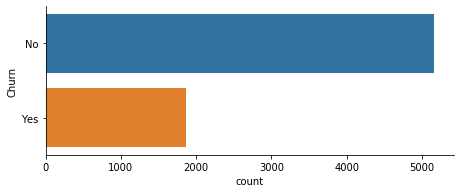

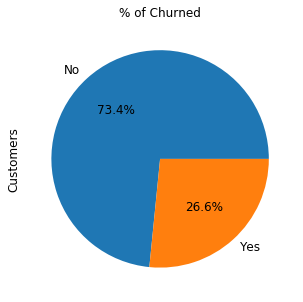

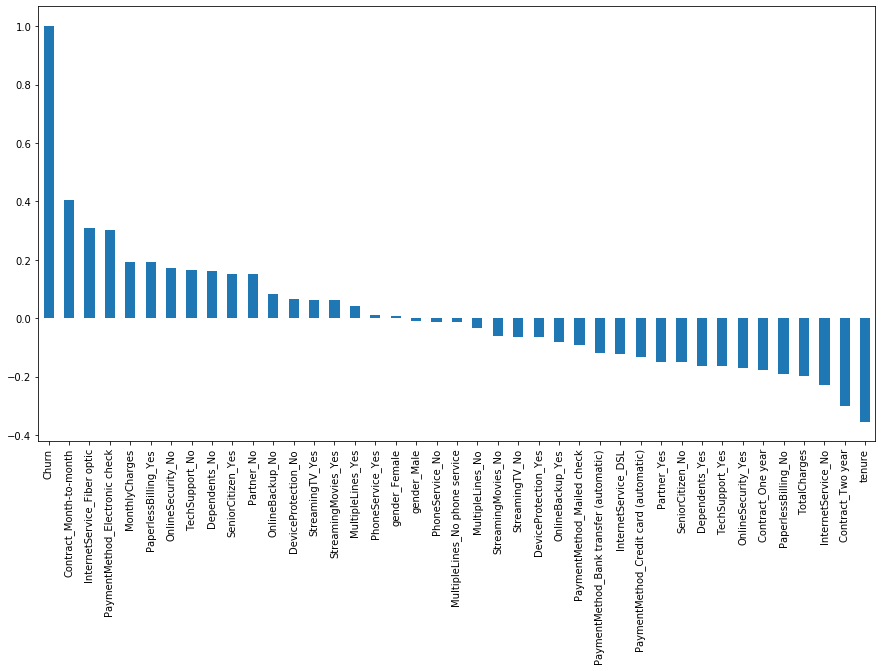

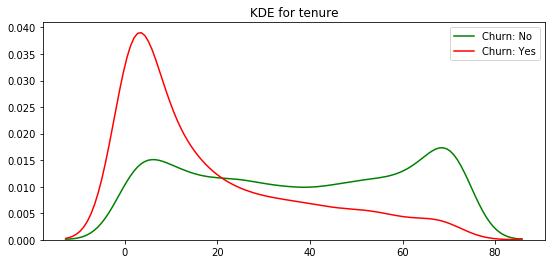

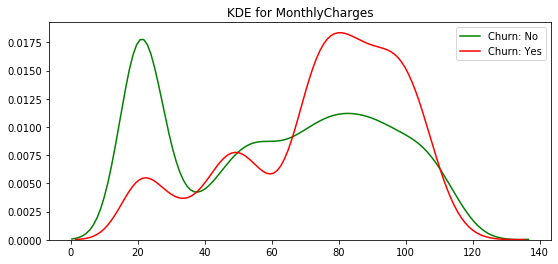

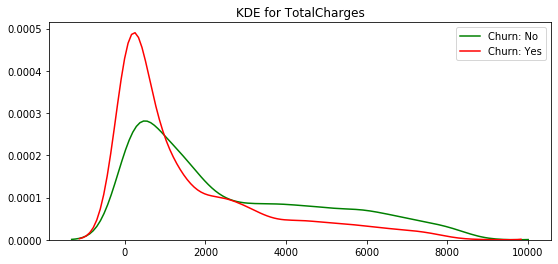

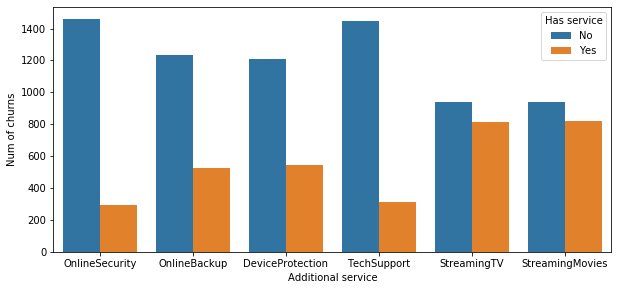

/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Intercept: [-1.01846474]
Regression: [[ 0.28807603 -0.00477915 -0.19164641 -0.03518689 -0.91403417  0.18896236
   0.17415247 -0.49873313 -0.12584377 -0.19840833 -0.54414984 -0.59018744
   0.4155533  -0.11343467  0.02776661]]
Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.66      0.52      0.58       558

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Lift score: 2.51


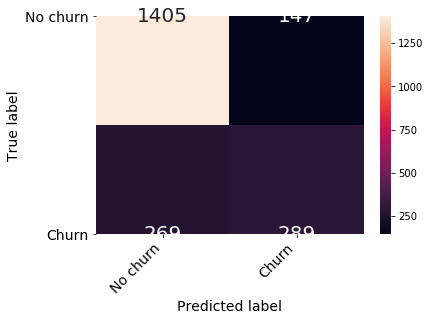

Lift score: 2.41
Accuracy of SVM classifier on test set: 0.78
Lift score: 2.51
Accuracy of ANN classifier on test set: 0.80


/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Accuracy of logistic regression classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1048
           1       0.75      0.82      0.78      1018

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

[0 0 0 ... 1 0 1]
[0.99066511 0.00933489]
Lift score: 2.64
Accuracy of decision tree unpruned classifier on test set: 0.79
Lift score: 2.31
Accuracy of random forest classifier on test set: 0.78
Lift score: 3.46
Accuracy of random forest classifier on test set: 0.90
Lift score: 2.44
Accuracy of random forest classifier on test set: 0.78


/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [70]:
%run Data_Analysis.ipynb
# telcompos= df.loc[telcom1['Churn'] == 1]
# telcomneg= df.loc[telcom1['Churn'] == 0]
#telcom1 = telcom1.values.tolist()
# telcompos= telcompos.values.tolist()
# telcomneg= telcomneg.values.tolist()

In [88]:
len(telcom1)

7032

In [71]:
telcom2 = telcom1.values.tolist()

In [72]:
data_majority = telcom1[telcom1['Churn']==0]

In [73]:
len(data_majority)

5163

In [74]:
telcom1

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,29.85,0
1,0,0,0,34,1,0,1,1,0,1,0,1,0,1,56.95,0
2,0,0,0,2,1,0,1,1,1,0,0,0,1,1,53.85,1
3,0,0,0,45,0,0,1,1,0,1,1,1,0,2,42.30,0
4,0,0,0,2,1,0,2,0,0,0,0,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,1,1,0,1,1,1,1,1,84.80,0
7028,0,1,1,72,1,1,2,0,1,1,0,1,1,3,103.20,0
7029,0,1,1,11,0,0,1,1,0,0,0,0,1,0,29.60,0
7030,1,1,0,4,1,1,2,0,0,0,0,0,1,1,74.40,1


In [75]:
feature = [ft[:-1] for ft in telcom1]
def plotLiftChart(actual, predicted):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title('Lift Chart')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")

In [76]:
telcompos=[]
telcomneg=[]
for i in range(0,len(telcom2)):
    if telcom2[i][15]==1:
        telcompos.append(telcom2[i])
    else:
        telcomneg.append(telcom2[i])
        

In [77]:
len(telcompos)

1869

In [78]:
len(telcomneg)

5163

In [79]:
print(telcompos[34][2])

0


In [90]:
len(train)

8260

In [80]:
import DecisionTree

In [92]:
#!/usr/bin/env python3

import CSVReader
import logging
import random
from concurrent.futures import ProcessPoolExecutor
from DecisionTree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
from numpy  import array


class RandomForestClassifier(object):

    """
    :param  nb_trees:       Number of decision trees to use
    :param  nb_samples:     Number of samples to give to each tree
    :param  max_depth:      Maximum depth of the trees
    :param  max_workers:    Maximum number of processes to use for training
    """
    def __init__(self, nb_trees, nb_samples, max_depth=-1, max_workers=1):
        self.trees = []
        self.nb_trees = nb_trees
        self.nb_samples = nb_samples
        self.max_depth = max_depth
        self.max_workers = max_workers
        self.alpha = random.uniform(0.25, 0.35)
    
    def sampler(self, data):
            m = 0.6
            d = 0.1
            alpha = random.uniform((m-d)/2, (m+d)/2)
            positive = random.sample(telcompos, int(alpha*self.nb_samples))
            negative = random.sample(telcomneg, int((1-alpha)*self.nb_samples)+1)
            total = positive+negative
            return total
    """
    Trains self.nb_trees number of decision trees.
    :param  data:   A list of lists with the last element of each list being
                    the value to predict
    """
    def fit(self, data):
        with ProcessPoolExecutor(max_workers=self.max_workers) as executor:
            rand_fts = map(lambda x: [x, self.sampler(data)], range(self.nb_trees))
            self.trees = list(executor.map(self.train_tree, rand_fts))

    """
    Trains a single tree and returns it.
    :param  data:   A List containing the index of the tree being trained
                    and the data to train it
    """
    def train_tree(self, data):
        
        logging.info('Training tree {}'.format(data[0] + 1))
        tree = DecisionTreeClassifier(max_depth=self.max_depth)

        tree.fit(data[1])
        return tree

    """
    Returns a prediction for the given feature. The result is the value that
    gets the most votes.
    :param  feature:    The features used to predict
    """
    def predict(self, feature):
        m = 0.6
        d = 0.1
        alpha = random.uniform((m-d)/2, (m+d)/2)
        churn_weight = 1 - alpha
        non_churn_weight = alpha
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(feature))
        
        result = (predictions.count(1)* churn_weight +  predictions.count(0)* non_churn_weight)/60    
        #print(result)  
        if result>=0.5:
            return result,1
        else:
            return result,0

        

def test_rf():
    from sklearn.model_selection import train_test_split

    #data = CSVReader.read_csv("income.csv")
    data= telcom1
    print(type(data))
    train, test = train_test_split(data, test_size=0.3)
    print(len(train))
    rf = RandomForestClassifier(nb_trees=60, nb_samples=2400, max_workers=4)
    
    ##resampling
    data_majority = train[train['Churn']==0]
    data_minority = train[train['Churn']==1]

    print(len(data_majority))
    print(len(test[test['Churn']==0]))
    data_minority_upsampled = resample(data_minority,
    replace=True,
    n_samples=len(data_majority), #same number of samples as majority classe
    random_state=1) #set the seed for random resampling
    # Combine resampled results
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])

    data_upsampled['Churn'].value_counts()
    test = test.values.tolist()
    data_upsampled = data_upsampled.values.tolist()
    rf.fit(train)

    errors = 0
    lf=3
    features = [ft[:-1] for ft in test]
    values = [ft[-1] for ft in test]
    tp=0
    tn=0
    fp=0
    fn=0
    
    
    probab=[]
    pro=[]
    for feature, value in zip(features, values):
        prob, prediction = rf.predict(feature)
        pro.append(prob)
        pro.append(1-prob)
        probab.append(pro)
        if prediction != value:
            errors += 1
        if prediction == 0 and value==0:
            tn=tn+1
        if prediction == 1 and value==1:
            tp=tp+1
        if prediction == 0 and value==1:
            fn=fn+1
        if prediction == 1 and value==0:
            fp=fp+1
    probab= array(probab)
    values= array(values)
    print(probab)   
    print(values)
    logging.info("Error rate: {}".format(errors / len(features) * 100))
    print("Error rate: {}".format(errors / len(features) * 100))
    print("Accuracy: {}".format(100-errors / len(features) * 100))
    print("Accuracy-cf: {}".format((tp+tn) / len(features) ))
    print("Lift: {}".format((tp*len(features))/((tp+fp)*(tp+fn))+lf))
    print("Precision-cf: {}".format(tp / (tp+fp) ))
    print("Recall-cf: {}".format(tp/ (tp+fn) ))
    #skplt.metrics.plot_lift_curve(values, probab)

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    test_rf()

<class 'pandas.core.frame.DataFrame'>
4922
3615
1548


INFO:root:Training tree 1
INFO:root:Training tree 2
INFO:root:Training tree 3
INFO:root:Training tree 4
INFO:root:Training tree 5
INFO:root:Training tree 6
INFO:root:Training tree 7
INFO:root:Training tree 8
INFO:root:Training tree 9
INFO:root:Training tree 10
INFO:root:Training tree 11
INFO:root:Training tree 12
INFO:root:Training tree 13
INFO:root:Training tree 14
INFO:root:Training tree 15
INFO:root:Training tree 16
INFO:root:Training tree 17
INFO:root:Training tree 18
INFO:root:Training tree 19
INFO:root:Training tree 20
INFO:root:Training tree 21
INFO:root:Training tree 22
INFO:root:Training tree 23
INFO:root:Training tree 24
INFO:root:Training tree 25
INFO:root:Training tree 26
INFO:root:Training tree 27
INFO:root:Training tree 28
INFO:root:Training tree 29
INFO:root:Training tree 30
INFO:root:Training tree 31
INFO:root:Training tree 32
INFO:root:Training tree 33
INFO:root:Training tree 34
INFO:root:Training tree 35
INFO:root:Training tree 36
INFO:root:Training tree 37
INFO:root:

[[0.33105979 0.66894021 0.37047466 ... 0.40311328 0.37366941 0.62633059]
 [0.33105979 0.66894021 0.37047466 ... 0.40311328 0.37366941 0.62633059]
 [0.33105979 0.66894021 0.37047466 ... 0.40311328 0.37366941 0.62633059]
 ...
 [0.33105979 0.66894021 0.37047466 ... 0.40311328 0.37366941 0.62633059]
 [0.33105979 0.66894021 0.37047466 ... 0.40311328 0.37366941 0.62633059]
 [0.33105979 0.66894021 0.37047466 ... 0.40311328 0.37366941 0.62633059]]
[0 0 0 ... 0 1 0]
Error rate: 5.687203791469194
Accuracy: 94.31279620853081
Accuracy-cf: 0.943127962085308
Lift: 6.353617608692899
Precision-cf: 0.8932384341637011
Recall-cf: 0.8932384341637011
